# Figure 10. Relative distance distributions (all subs)

### Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data import load_data
from utils import get_relative_dist_df, get_kl_df
from vis import DISC_EDGES, FREE_COLOR, RAND_COLOR, plot_error_by_set_size, plot_error_by_response, plot_error_by_response_stacked, plot_error_by_response_ecdf, set_axes_labels, set_export_style, plot_paired_error_by_set_size, plot_paired_error_by_response, set_axes_aspect, plot_relative_distance_scatter, paired_hist, set_axes_rad, plot_bootstrapped_kl, plot_paired_relative_distance

save_fig = False

### Load data

In [2]:
### DATASET LOADING ###
modality = 'color'
set_size = 6 # for response plotting

# continuous datasets
df_free_cont = load_data(modality=modality, condition='free', dataset='continuous')
df_free_cont_6 = df_free_cont[df_free_cont.set_size == set_size].reset_index(drop=True)

df_rand_cont = load_data(modality=modality, condition='rand', dataset='continuous')
df_rand_cont_6 = df_rand_cont[df_rand_cont.set_size == set_size].reset_index(drop=True)

# discrete datasets
df_free_disc = load_data(modality=modality, condition='free', dataset='discrete')
df_free_disc_6 = df_free_disc[df_free_disc.set_size == set_size].reset_index(drop=True)

df_rand_disc = load_data(modality=modality, condition='rand', dataset='discrete')
df_rand_disc_6 = df_rand_disc[df_rand_disc.set_size == set_size].reset_index(drop=True)

In [3]:
# subIDs
# note that the same participants did both conditions for the discrete task

free_disc_subs = np.sort(df_free_disc.subject.unique())
rand_disc_subs = np.sort(df_rand_disc.subject.unique())
print(f'free discrete subs: \n {free_disc_subs}')
print(f'rand discrete subs: \n {rand_disc_subs}')

free_cont_subs = np.sort(df_free_cont.subject.unique())
rand_cont_subs = np.sort(df_rand_cont.subject.unique())
print(f'free continuous subs: \n {free_cont_subs}')
print(f'rand continuous subs: \n {rand_cont_subs}')

free discrete subs: 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
rand discrete subs: 
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
free continuous subs: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
rand continuous subs: 
 [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


### Figure 10A. Discrete relative distance distributions

Subject 2


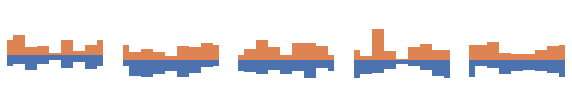

Subject 3


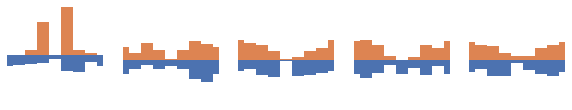

Subject 4


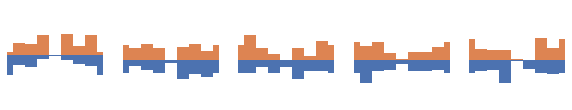

Subject 5


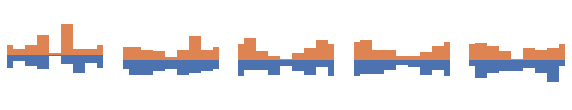

Subject 6


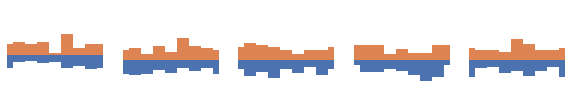

Subject 7


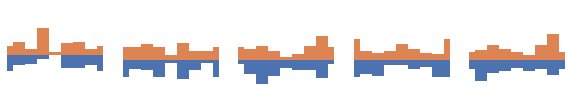

Subject 8


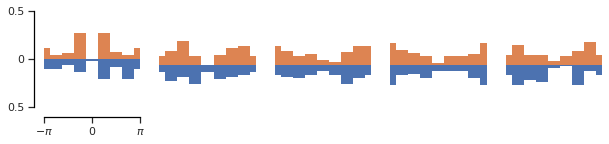

Subject 9


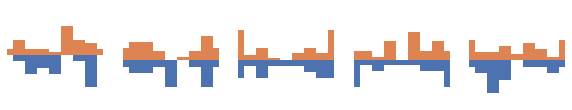

Subject 10


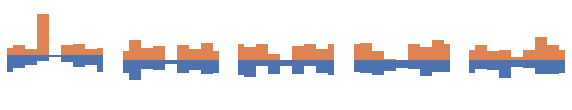

Subject 11


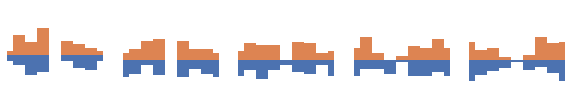

Subject 12


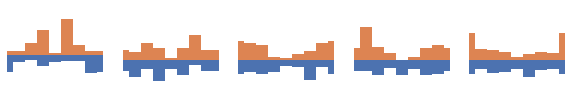

Subject 13


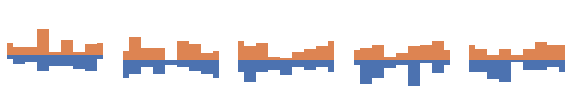

Subject 14


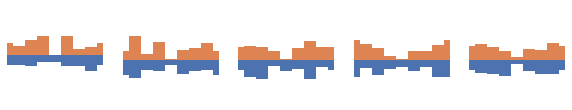

Subject 15


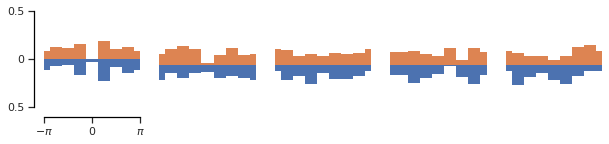

In [40]:
# discrete by sub
for sub in free_disc_subs:
    free_df = df_free_disc_6[df_free_disc_6['subject'] == sub]
    rand_df = df_rand_disc_6[df_rand_disc_6['subject'] == sub]
    
    fig, axes = plot_paired_relative_distance(free_df, rand_df, 
                                              bins=DISC_EDGES,
                                              split_pi=True,
                                              histtype='stepfilled')
    for ax in axes[1:]:
        ax.set_ylim([-0.4, 0.5])
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['left'].set_position(('outward',10))
    axes[0].spines['bottom'].set_position(('outward',10))
    axes[0].set_ylim([-0.5, 0.5])
    axes[0].set_yticks([-0.5, 0, 0.5])
    axes[0].set_yticklabels([0.5, 0, 0.5])
    
    set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))
    set_axes_aspect(fig, axes)
    
    
    if sub != 15 and sub != 8:
        axes[0].set_xticks([])
        axes[0].set_xticklabels([])
        axes[0].spines['bottom'].set_visible(False)
        axes[0].set_yticks([])
        axes[0].set_yticklabels([])
        axes[0].spines['left'].set_visible(False)
    
    if save_fig:
        filename = f'../figures/fig_S03_relative_dists_disc_{sub}.png'
        plt.savefig(filename, bbox_inches='tight', dpi=800)
    
    print(f'Subject {sub}')
    plt.show()

### Figure 10B. Continuous relative distance distributions

Subjects 1 (top) and 23 (bottom)


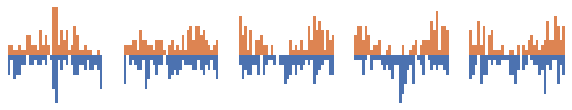

Subjects 2 (top) and 24 (bottom)


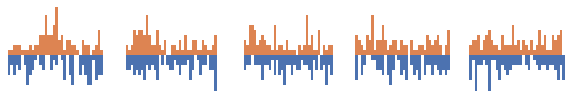

Subjects 3 (top) and 25 (bottom)


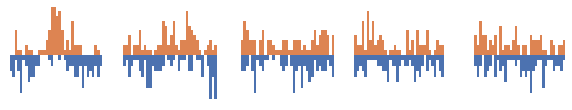

Subjects 4 (top) and 26 (bottom)


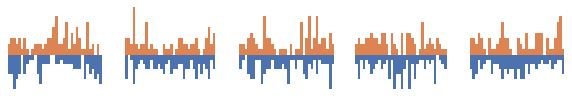

Subjects 5 (top) and 27 (bottom)


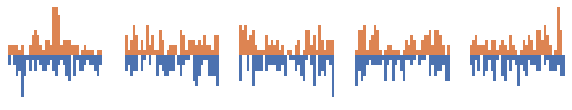

Subjects 6 (top) and 28 (bottom)


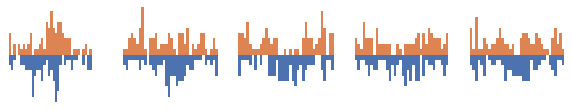

Subjects 7 (top) and 29 (bottom)


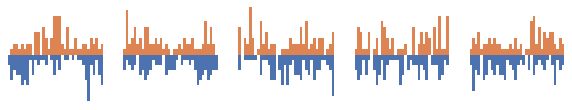

Subjects 8 (top) and 30 (bottom)


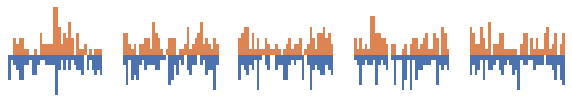

Subjects 9 (top) and 31 (bottom)


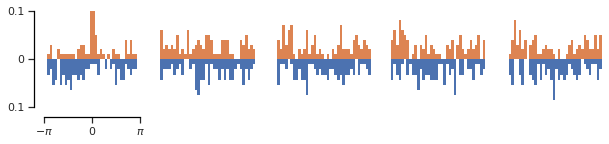

Subjects 10 (top) and 32 (bottom)


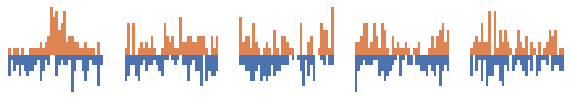

Subjects 11 (top) and 33 (bottom)


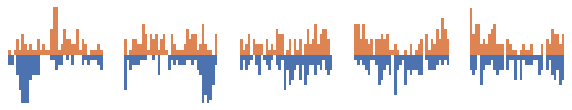

Subjects 12 (top) and 34 (bottom)


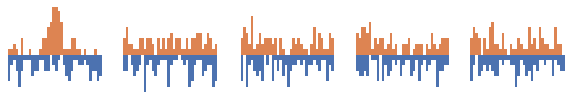

Subjects 13 (top) and 35 (bottom)


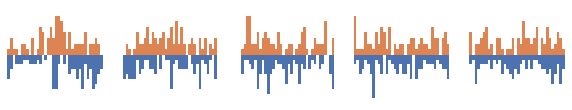

Subjects 14 (top) and 36 (bottom)


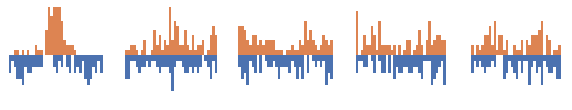

Subjects 15 (top) and 37 (bottom)


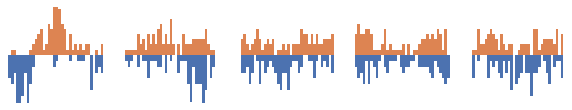

Subjects 16 (top) and 38 (bottom)


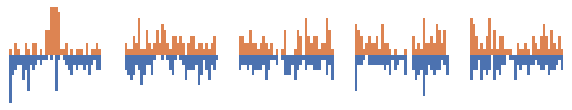

Subjects 17 (top) and 39 (bottom)


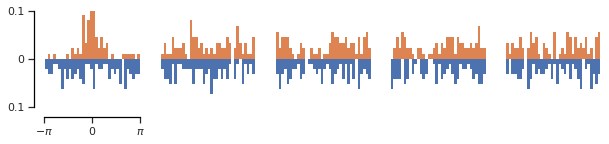

In [44]:
for free_sub, rand_sub in zip(free_cont_subs[:17], rand_cont_subs):
    free_df = df_free_cont_6[df_free_cont_6['subject'] == free_sub]
    rand_df = df_rand_cont_6[df_rand_cont_6['subject'] == rand_sub]
    
    fig, axes = plot_paired_relative_distance(free_df, rand_df,
                                             bins=36)
    
    for ax in axes[1:]:
        ax.set_ylim([-0.1, 0.1])
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    axes[0].spines['right'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['left'].set_position(('outward',10))
    axes[0].spines['bottom'].set_position(('outward',10))
    axes[0].set_ylim([-0.1, 0.1])
    axes[0].set_yticks([-0.1, 0, 0.1])
    axes[0].set_yticklabels([0.1, 0, 0.1])
    
    set_axes_aspect(fig, axes)
    set_export_style(fig, axes, remove_ticklabels=False, figsize=(10, 3))
    
    if free_sub != 9 and free_sub != 17:
        axes[0].set_xticks([])
        axes[0].set_xticklabels([])
        axes[0].spines['bottom'].set_visible(False)
        axes[0].set_yticks([])
        axes[0].set_yticklabels([])
        axes[0].spines['left'].set_visible(False)

    if save_fig:    
        filename = f'../figures/fig_S03_relative_dists_cont_{free_sub}.png'
        plt.savefig(filename, bbox_inches='tight', dpi=800)
        
    print(f'Subjects {free_sub} (top) and {rand_sub} (bottom)')
    plt.show()